In [227]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

In [228]:
df = pd.read_csv(r'master1.csv')

In [229]:
df.shape

(27820, 12)

In [230]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900.0,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,NaN,308000.0,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14.0,NaN,NaN,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1.0,21800.0,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300.0,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


In [231]:
# info of the parameters

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27757 non-null float64
population            27753 non-null float64
suicides/100k pop     27763 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(4), int64(2), object(6)
memory usage: 2.5+ MB


In [232]:
#Data Cleaning

In [233]:
# to check the number of null values in each parameter

df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no              63
population               67
suicides/100k pop        57
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [234]:
#Replacing all the NaN values by the mean of that particular column

df['population']=df['population'].fillna(df['population'].mean())
df['suicides_no']=df['suicides_no'].fillna(df['suicides_no'].mean())
df['suicides/100k pop']=df['suicides/100k pop'].fillna(df['suicides/100k pop'].mean())

In [235]:
df['population']

0        3.129000e+05
1        3.080000e+05
2        1.847626e+06
3        2.180000e+04
4        2.743000e+05
             ...     
27815    1.847626e+06
27816    3.484650e+05
27817    2.762158e+06
27818    1.847626e+06
27819    1.438935e+06
Name: population, Length: 27820, dtype: float64

In [236]:
# since we see that most of HDI(human development index) values are empty and we do not need the country-year column, we drop these columns.

df.drop(['country-year', 'HDI for year'], inplace=True, axis = 1)

In [237]:
# renaming some columns simply to make it easier to access them.

df = df.rename(columns={'gdp_per_capita ($)': 'gdp_per_capita', ' gdp_for_year ($) ':'gdp_for_year'})

In [238]:
# Possible age categories 

df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [239]:
# Possible generations

df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [240]:
#Cleaned dataset
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21.000000,3.129000e+05,6.710000,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,243.061822,3.080000e+05,5.190000,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14.000000,1.847626e+06,12.833986,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1.000000,2.180000e+04,4.590000,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9.000000,2.743000e+05,3.280000,"2,15,66,24,900",796,Boomers
5,Albania,1987,female,75+ years,1.000000,3.560000e+04,2.810000,"2,15,66,24,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,243.061822,2.788000e+05,2.150000,"2,15,66,24,900",796,Silent
7,Albania,1987,female,25-34 years,4.000000,2.572000e+05,1.560000,"2,15,66,24,900",796,Boomers
8,Albania,1987,male,55-74 years,1.000000,1.375000e+05,12.833986,"2,15,66,24,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,243.061822,1.847626e+06,0.000000,"2,15,66,24,900",796,Generation X


In [241]:
df.isnull().sum()

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64

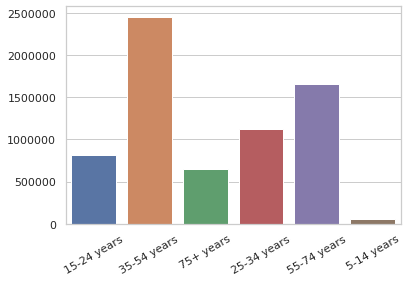

In [242]:
# plot visualizing number of suicides wth respect to age-groups.

suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df[df['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['age'].unique(), y = suicides_no_age)

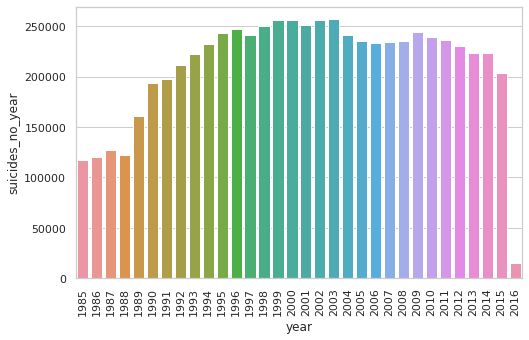

In [243]:
# plot of number_of suicides wrt year


suicides_no_year = []

for y in df['year'].unique():
    suicides_no_year.append(sum(df[df['year'] == y]['suicides_no']))

n_suicides_year = pd.DataFrame(suicides_no_year, columns=['suicides_no_year'])
n_suicides_year['year'] = df['year'].unique()

top_year = n_suicides_year.sort_values('suicides_no_year', ascending=False)['year']
top_suicides = n_suicides_year.sort_values('suicides_no_year', ascending=False)['suicides_no_year']

plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
sns.barplot(x = top_year, y = top_suicides)

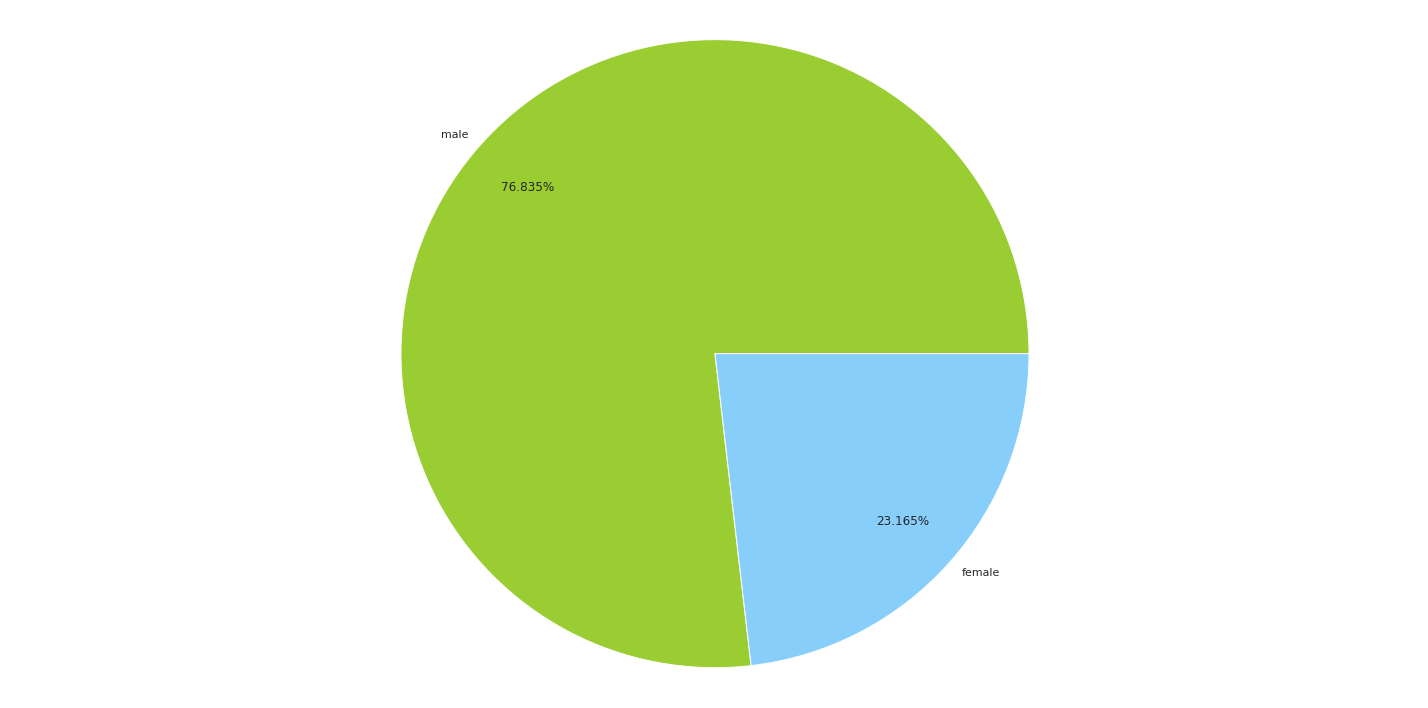

In [244]:
# who among men and women commit more suicide

suicides_no_sex = []

for s in df['sex'].unique():
    suicides_no_sex.append(sum(df[df['sex'] == s]['suicides_no']))

# sns.barplot(x = df['sex'].unique(), y = suicides_no_sex)

labels = df['sex'].unique()
sizes = df['sex'].value_counts()
colors = ['yellowgreen',  'lightskyblue']
plt.figure(figsize=(20, 10))
plt.pie(suicides_no_sex, labels=labels, autopct='%0.3f%%', pctdistance=0.8, labeldistance=1.05, colors = colors, radius = 2)
plt.axis('equal')
plt.tight_layout()
plt.show()

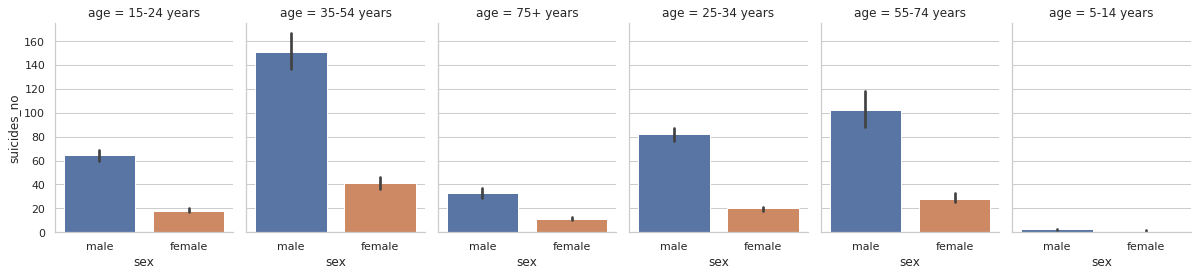

In [245]:
# we see thatdefinitely men commits more suicide than women
# just for curiosity, lets check whether this pattern appears in all age groups

sns.catplot(x='sex', y='suicides_no',col='age', data=df, estimator=np.median,height=4, aspect=.7,kind='bar')

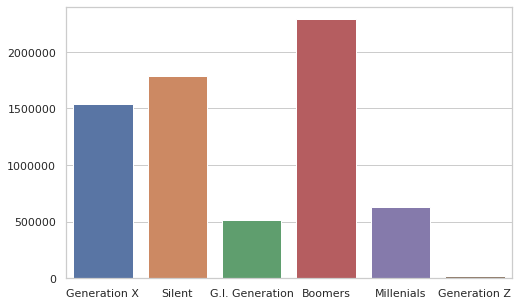

In [246]:
#Plot of suicide rate between generations.
# Generation Z -: small_children
# G.I Generation -: old people
# Millenials -: youngsters
# Boomers, Silent -: middle age and youngsters
# generation_x -: all (small children, youngsters, middle age)


suicides_no_gen = []
for g in df['generation'].unique():
    suicides_no_gen.append(sum(df[df['generation'] == g]['suicides_no']))

plt.figure(figsize=(8,5))
sns.barplot(x = df['generation'].unique(), y = suicides_no_gen)

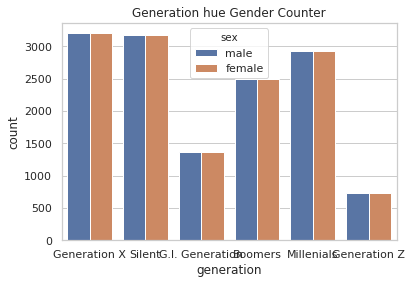

In [247]:
sns.countplot(df.generation,hue=df.sex)
plt.title('Generation hue Gender Counter')
plt.show()

In [248]:
# We see that - 
# Generation Z has very low chance to suicide
# G.I Generation do but comparatively less suicide
# Millenials alone not much suicide
# Boomers, Silent are doing more suicides
# generation_x has high number too.

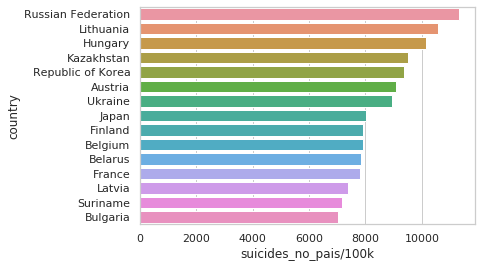

In [249]:
#top 15 countries with higher suicide rates

suicides_no_pais = []
for c in df['country'].unique():
    suicides_no_pais.append(sum(df[df['country'] == c]['suicides/100k pop']))
    
n_suicides_pais = pd.DataFrame(suicides_no_pais, columns=['suicides_no_pais/100k'])
n_suicides_pais['country'] = df['country'].unique()

quant = 15
top_paises = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['country'][:quant]
top_suicides = n_suicides_pais.sort_values('suicides_no_pais/100k', ascending=False)['suicides_no_pais/100k'][:quant]
sns.barplot(x = top_suicides, y = top_paises)

In [250]:
# it is very interesting to assess whether the development of the country has an influence on the suicide rate,then we 
# have separated a list of first and second world countries from the data of the site:
# http://worldpopulationreview.com

# Then we categorized each country in the data set into first, second and third world based on the development


Frist_world = ['United States', 'Germany', 'Japan', 'Turkey', 'United Kingdom', 'France', 'Italy', 'South Korea',
              'Spain', 'Canada', 'Australia', 'Netherlands', 'Belgium', 'Greece', 'Portugal', 
              'Sweden', 'Austria', 'Switzerland', 'Israel', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Ireland',
              'New Zeland', 'Slovenia', 'Estonia', 'Cyprus', 'Luxembourg', 'Iceland']

Second_world = ['Russian Federation', 'Ukraine', 'Poland', 'Uzbekistan', 'Romania', 'Kazakhstan', 'Azerbaijan', 'Czech Republic',
               'Hungary', 'Belarus', 'Tajikistan', 'Serbia', 'Bulgaria', 'Slovakia', 'Croatia', 'Maldova', 'Georgia',
               'Bosnia And Herzegovina', 'Albania', 'Armenia', 'Lithuania', 'Latvia', 'Brazil', 'Chile', 'Argentina',
               'China', 'India', 'Bolivia', 'Romenia']


country_world = []
for i in range(len(df)):
    
    if df['country'][i] in Frist_world:
        country_world.append('1')
    elif df['country'][i] in Second_world:
        country_world.append('2')
    else:
        country_world.append('3')

df['country_world'] = country_world


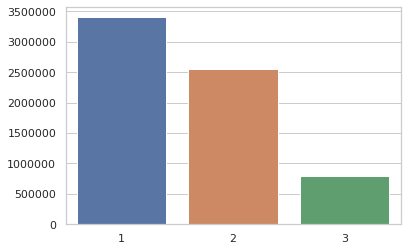

In [251]:
suicides_no_world = []
for w in df['country_world'].unique():
    suicides_no_world.append(sum(df[df['country_world'] == w]['suicides_no']))
    
sns.barplot(x = df['country_world'].unique(), y = suicides_no_world)

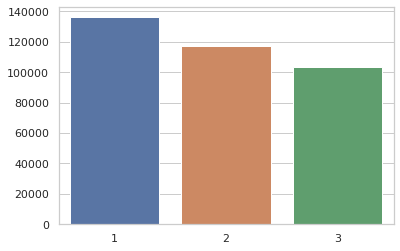

In [252]:
suicides_no_world = []
for w in df['country_world'].unique():
    suicides_no_world.append(sum(df[df['country_world'] == w]['suicides/100k pop']))
    
sns.barplot(x = df['country_world'].unique(), y = suicides_no_world)

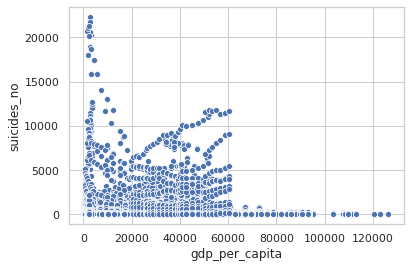

In [253]:
# whether gdp-per-capita has any influence

sns.scatterplot(x = 'gdp_per_capita', y = 'suicides_no', data = df)

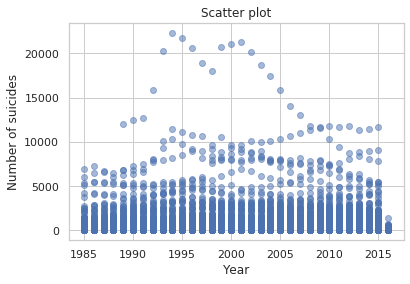

In [254]:
#Scatter plot between Year and Number_of_suicides
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as st
colors = ("red", "blue")
plt.scatter(df['year'],df['suicides_no'], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Year')
plt.ylabel('Number of suicides')
plt.show()

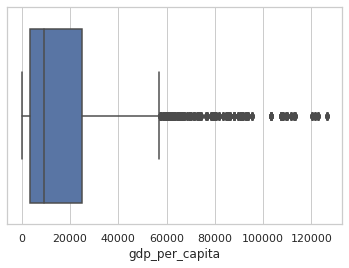

In [255]:
#Boxplot for GDP_Per_Capita
sns.set(style='whitegrid')
sns.boxplot(df['gdp_per_capita'])
plt.show()

In [256]:
# we see that in impoverished places, there is much suicide. As income increases, suicide decreases together.
# But this is not the case

In [257]:
# 1-Suicide are higher among men than women
# 2-Higher standards of living do not necessarily indicate lower suicide rates.
# 3-Suicide numbers were decreasing up till 2010, after which they started rising again.
# 4-Middle-aged people are more likely to commit suicides globally.
# 5-The year, sex, and population are strong indicators when used to predict the number of suicides for a country.

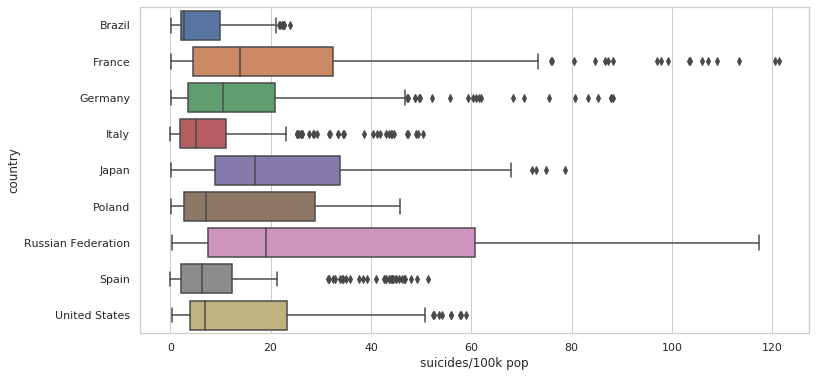

In [258]:
#checking suicides per 100k population for some countries

countries = ['Russian Federation', 'Brazil', 'Poland', 'Italy', 'United States', 'Germany', 'Japan', 'Spain', 'France']
df_filtred = df[[df['country'][i] in countries for i in range(len(df))]]

plt.figure(figsize=(12,6))
sns.boxplot(x = 'suicides/100k pop', y = 'country', data = df_filtred)


In [259]:
#for converting gdp_for_year from string to number by removing all the commas and converting to int.

for i in range(27820):
    df["gdp_for_year"][i]=df['gdp_for_year'][i].replace(",","")
df["gdp_for_year"]= pd.to_numeric(df["gdp_for_year"])


/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [260]:
df['gdp_for_year']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name: gdp_for_year, Length: 27820, dtype: int64

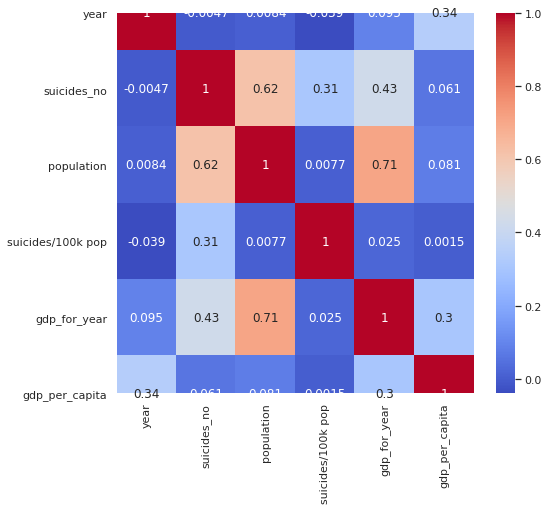

In [261]:
# to find coorelation between parameters(heatmap for the dataset)

plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot=True)


In [262]:
#Positive correlations(proportional)and negative correlations(Inversely proportional) are displayed here. 
#Color intensity and the size of the square are proportional to the correlation coefficients. 
#The maximum correlation is between population and suicides no which is 0.62,if there are more people, then more suicides.
# The correlation between GDP per capita and the world of the country occurs negatively
# since the first world countries have a higher income, and third world, lower income.

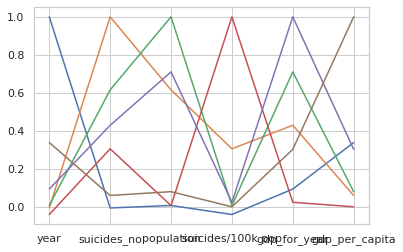

In [263]:
#Correlation Plot
df.corr(method='pearson')
plt.plot(df.corr(method='pearson'))

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


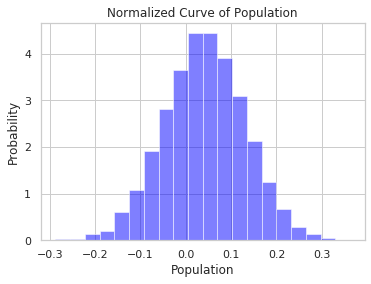

In [264]:
#Normalized curve for population
# example data
mu = 0.042172 # mean of distribution
sigma = 0.089284 # standard deviation of distribution
x = mu + sigma * np.random.randn(10000)

num_bins = 20
# the histogram of the data
n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='blue', alpha=0.5)


plt.xlabel('Population')
plt.ylabel('Probability')
plt.title(r'Normalized Curve of Population')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [265]:
df['gdp_for_year']

0         2156624900
1         2156624900
2         2156624900
3         2156624900
4         2156624900
            ...     
27815    63067077179
27816    63067077179
27817    63067077179
27818    63067077179
27819    63067077179
Name: gdp_for_year, Length: 27820, dtype: int64

In [266]:
df['population']

0        3.129000e+05
1        3.080000e+05
2        1.847626e+06
3        2.180000e+04
4        2.743000e+05
             ...     
27815    1.847626e+06
27816    3.484650e+05
27817    2.762158e+06
27818    1.847626e+06
27819    1.438935e+06
Name: population, Length: 27820, dtype: float64

In [267]:
df['population']=df['population']/df['population'].mean()

In [268]:
df['population']

0        0.169352
1        0.166700
2        1.000000
3        0.011799
4        0.148461
           ...   
27815    1.000000
27816    0.188602
27817    1.494977
27818    1.000000
27819    0.778802
Name: population, Length: 27820, dtype: float64

In [269]:
df['gdp_for_year']=df['gdp_for_year']/df['gdp_for_year'].mean()

In [270]:
df['gdp_for_year']

0        0.004840
1        0.004840
2        0.004840
3        0.004840
4        0.004840
           ...   
27815    0.141543
27816    0.141543
27817    0.141543
27818    0.141543
27819    0.141543
Name: gdp_for_year, Length: 27820, dtype: float64

In [271]:
df['gdp_for_year'].mean()

0.9999999999999923

In [272]:
df['population'].mean()

1.0000000000000009

In [273]:
# Hypothesis testing
# Lets take H0 -> means are related , H1 -> means are not related 

In [274]:

import random
from scipy.stats import ttest_ind

l1=[]
l2=[]
l1=random.sample(list(df['population']),200) #ramdomly taking 100 values 
l2=random.sample(list(df['gdp_for_year']),200) #ramdomly taking 100 values 
    
stat, p = ttest_ind(l1, l2)
print('t=%.3f, p=%.3f' % (stat, p))


t=3.430, p=0.001


In [275]:
# since p-value is greater than 0.05 we conclude that we cannot reject the null hypothesis, its plausible.

In [276]:
# Using linear regression for predicting suicude trend of male and female of all age groups belonging to the country Sweden.

data = pd.read_csv("master1.csv")
data = data[data['country'] == 'Sweden']  

In [277]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
data = data.dropna(axis = 0)  # the lines having null values are deleted
data.head()

HDI for year    250
dtype: int64


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
24404,Sweden,1990,male,75+ years,144.0,261500.0,55.07,Sweden1990,0.815,"2,58,15,42,83,909",32246,G.I. Generation
24405,Sweden,1990,male,55-74 years,287.0,798100.0,35.96,Sweden1990,0.815,"2,58,15,42,83,909",32246,G.I. Generation
24406,Sweden,1990,male,35-54 years,340.0,1174000.0,28.96,Sweden1990,0.815,"2,58,15,42,83,909",32246,Silent
24407,Sweden,1990,male,25-34 years,157.0,606600.0,25.88,Sweden1990,0.815,"2,58,15,42,83,909",32246,Boomers
24408,Sweden,1990,female,55-74 years,138.0,883800.0,15.61,Sweden1990,0.815,"2,58,15,42,83,909",32246,G.I. Generation


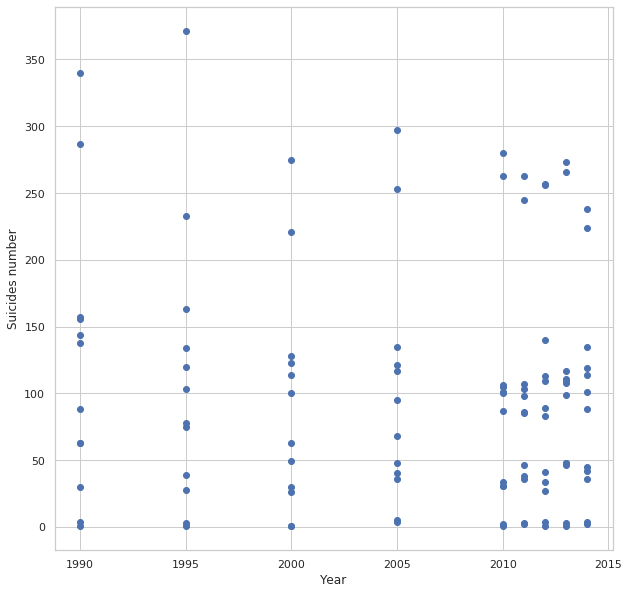

In [278]:
x = np.array(data.loc[:,'year']).reshape(-1,1)
y = np.array(data.loc[:,'suicides_no']).reshape(-1,1)
#Scatter Plot
plt.figure(figsize = [10,10])
plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Suicides number')
plt.show()

female 5-14 years R^2 Score:  0.29859778597786213


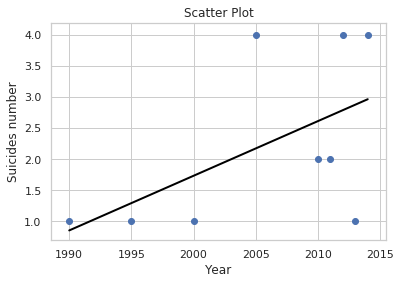

female 15-24 years R^2 Score:  0.4124653289256529


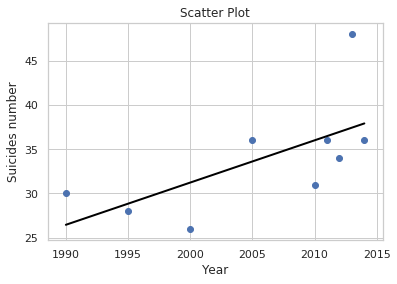

female 25-34 years R^2 Score:  0.17955804202895143


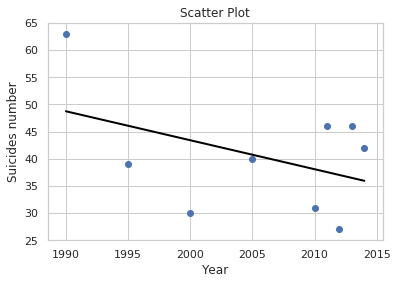

female 35-54 years R^2 Score:  0.4301380117836151


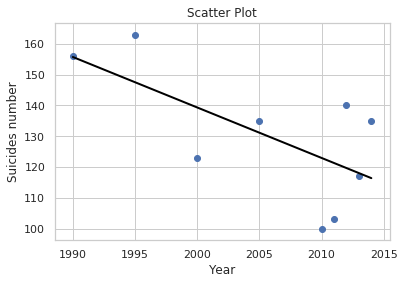

female 55-74 years R^2 Score:  0.3901178688045873


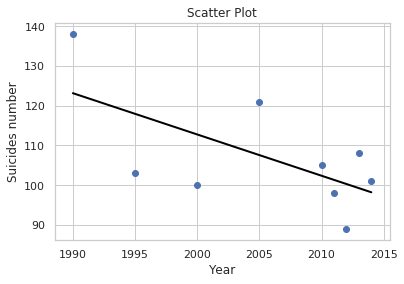

female 75+ years R^2 Score:  0.6255903050833755


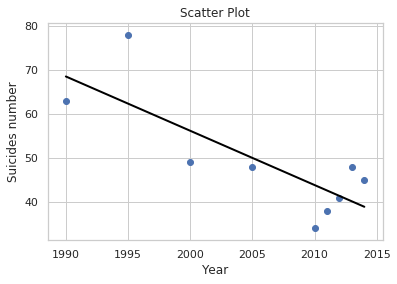

male 5-14 years R^2 Score:  0.13102663903350986


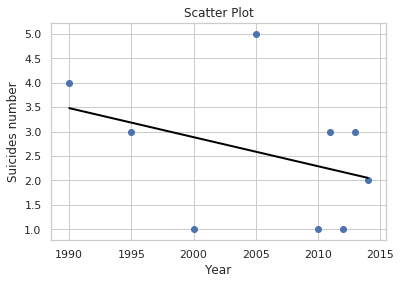

male 15-24 years R^2 Score:  0.16567146063074


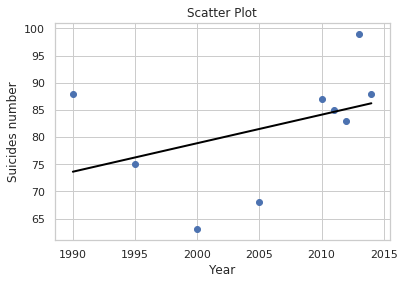

male 25-34 years R^2 Score:  0.5888635834673055


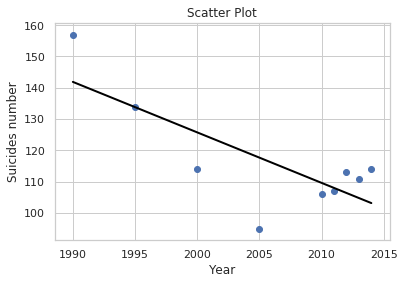

male 35-54 years R^2 Score:  0.7608120973316774


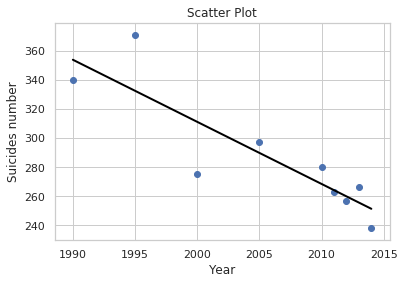

male 55-74 years R^2 Score:  0.0196216687224674


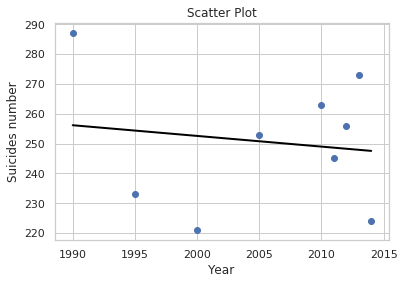

male 75+ years R^2 Score:  0.5435074794854007


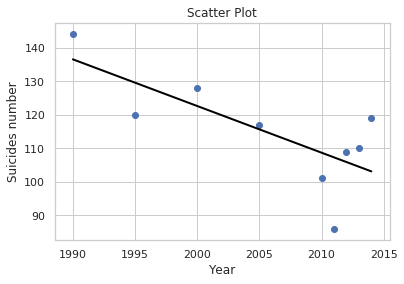

In [279]:
#Linear Regression Models
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)  # Prediction Space

lis = ['female', 'male']
lis2 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in lis:
    for k in lis2:
        data_1 = data[data['sex'] == i]
        data_sex = data_1[data_1['age'] == k ]
        x_sex = np.array(data_sex.loc[:,'year']).reshape(-1,1)
        y_sex = np.array(data_sex.loc[:,'suicides_no']).reshape(-1,1)
        reg.fit(x_sex,y_sex)                                               # Fit
        predicted = reg.predict(predict_space)                     # Prediction
        print( i, k, 'R^2 Score: ', reg.score(x_sex,y_sex))                       # R^2 calculation
        plt.plot(predict_space, predicted, color = 'black', linewidth = 2)
        plt.scatter(x_sex,y_sex)
        plt.title('Scatter Plot')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()

In [280]:
# Conclusion
# Suicide numbers in Sweden are - 
# obviously decreasing in 35-54 years old male people with 76% R^2 which is a good development,
# increasing in 15-24 years old female people with 41% R^2 and 5-14 years old female with 29.8% R^2. There is some imbalance and attention must be paid.

In [281]:
df['generation'].head(10)

0       Generation X
1             Silent
2       Generation X
3    G.I. Generation
4            Boomers
5    G.I. Generation
6             Silent
7            Boomers
8    G.I. Generation
9       Generation X
Name: generation, dtype: object

In [282]:
df['population'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
27815    0
27816    0
27817    1
27818    0
27819    0
Name: population, Length: 27820, dtype: int64

In [283]:
data={'year':df['year'],'population':df['population'].astype(int)}

In [284]:
df1=pd.DataFrame(data)
df1.head()

,year,population
0,1987,0
1,1987,0
2,1987,0
3,1987,0
4,1987,0


In [285]:
df['suicides_no']

0         21.000000
1        243.061822
2         14.000000
3          1.000000
4          9.000000
            ...    
27815    107.000000
27816    243.061822
27817     60.000000
27818     44.000000
27819     21.000000
Name: suicides_no, Length: 27820, dtype: float64

In [286]:
Y = df.iloc[:, 4].values
Y=Y.astype(int)
Y

array([ 21, 243,  14, ...,  60,  44,  21])

In [287]:
df1.population.max()

23

In [288]:
#Multiple Linear Regression
import pandas as pd
df2=pd.DataFrame(df1,columns=['year','population'])
df2['suicides_no']=pd.Series(Y)
df2

,year,population,suicides_no
0,1987,0,21
1,1987,0,243
2,1987,0,14
3,1987,0,1
4,1987,0,9
...,...,...,...
27815,2014,0,107
27816,2014,0,243
27817,2014,1,60
27818,2014,0,44


In [289]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='suicides_no ~ year + population', data=df2)
results_formula = model.fit()
results_formula.params

Intercept     2106.541435
year            -1.029435
population     272.295717
dtype: float64

In [290]:

x_surf, y_surf = np.meshgrid(np.linspace(df2.year.min(), df2.year.max(), 100),np.linspace(df2.population.min(), df2.population.max(), 100))
onlyX = pd.DataFrame({'year': x_surf.ravel(), 'population': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

In [291]:
fittedY=np.array(fittedY)

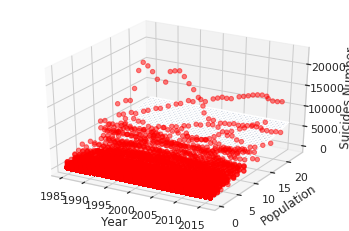

In [292]:
#The 3D plot-multiple linear regression plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['year'],df2['population'],df2['suicides_no'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_zlabel('Suicides Number')
plt.show()

In [224]:
df.to_csv('cleaneddata.csv')